In [37]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

In [38]:
# Reading Image
img = cv.imread("img.jpg")

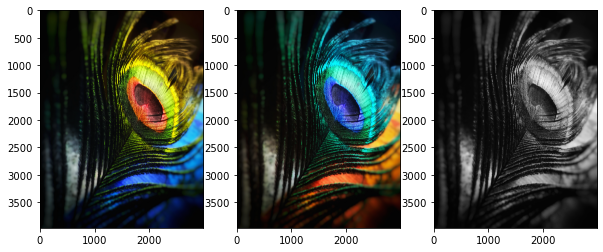

In [39]:
#Ploting Image using matplotlib

fig,axs = plt.subplots(1,3, figsize=(10,4) )
axs[0].imshow(img)
axs[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[2].imshow(cv.cvtColor(img, cv.COLOR_BGR2GRAY),cmap = 'gray')
plt.show()

In [40]:
img.shape

(3968, 2976, 3)

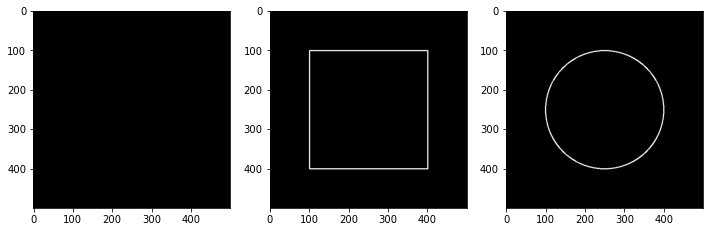

In [41]:
# Drawing on Images

blank = np.zeros((500,500), dtype = 'uint8' )
rect = cv.rectangle(blank.copy(),(100,100),(400,400),(256),2)
circ = cv.circle(blank.copy(),(blank.shape[1]//2,blank.shape[0]//2),150,(256),2)

fig,axs = plt.subplots(1,3,figsize=(12,4))
axs[0].imshow(blank, cmap = "gray")
axs[1].imshow(rect, cmap = "gray")
axs[2].imshow(circ, cmap = "gray")

In [42]:
# Basic Image Transformation 

# Function to Translate
def translate(img,tx,ty):
  M = np.float32([[1, 0, tx], [0, 1, ty]])
  return cv.warpAffine(img,M,(img.shape[1]+tx,img.shape[0]))

# Function to Rotation 
def rotate(img,theta,center=None):
  (height,width) = img.shape[:2]
  if center is None:
    center = (width//2, height//2)
  M = cv.getRotationMatrix2D(center = center, angle=theta, scale=1)
  return cv.warpAffine(img,M,(width,height))

# Function to Resize Image
def resize(img,size):
  return cv.resize(img,size,interpolation = cv.INTER_AREA)

# Function to Flip Image (arg = 1: Horizontal flip, arg = 0:bVertical Flip, arg = -1: Vertical and Horizontal)
def flip(img,arg):
  return cv.flip(img,arg) 

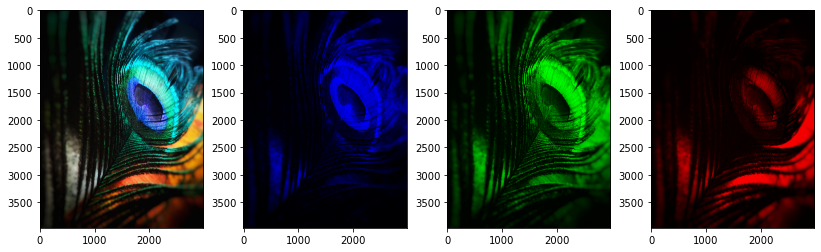

In [43]:
# Color Channels (Spliting Images to its Components)

b,g,r = cv.split(img)

blank = np.zeros(img.shape[:2],dtype="uint8")

b = cv.merge([b,blank,blank])
g = cv.merge([blank,g,blank])
r = cv.merge([blank,blank,r])

fig,axs = plt.subplots(1,4,figsize=(14,4))

axs[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
axs[1].imshow(cv.cvtColor(b,cv.COLOR_BGR2RGB))
axs[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
axs[3].imshow(cv.cvtColor(r,cv.COLOR_BGR2RGB))


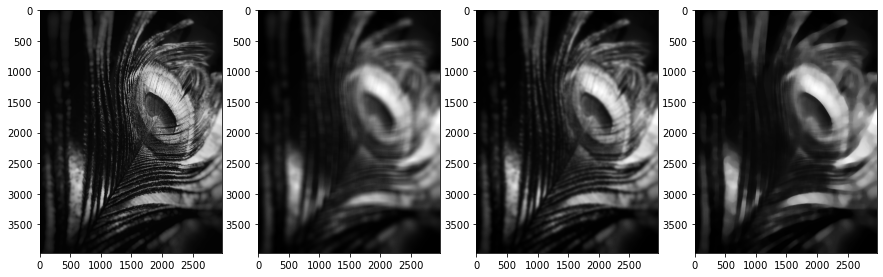

In [44]:
# Blurinig 

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Average Bluring
avg_blur = cv.blur(gray,(99,99))

# Gaussian Bluring 
gauss_blur = cv.GaussianBlur(gray,(99,99),0)

# Median Bluring 
median_blur = cv.medianBlur(gray,99)

# Bilaateral Blur
# bi_blur = cv.bilateralFilter(gray,99,150,175)???

fig,axs = plt.subplots(1,4,figsize=(15,12))
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(avg_blur, cmap="gray")
axs[2].imshow(gauss_blur,cmap="gray")
axs[3].imshow(median_blur,cmap="gray")



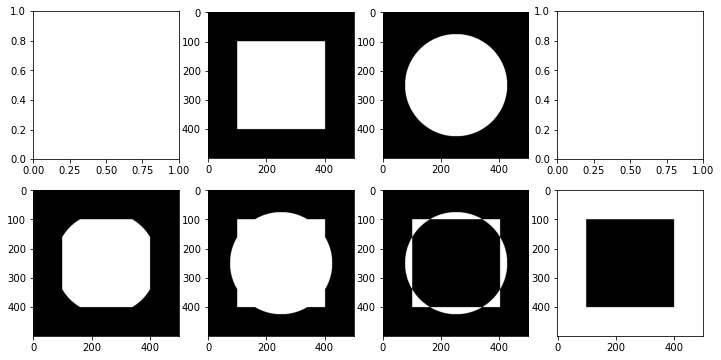

In [45]:
# Bitwise Operators
blank = np.zeros((500,500),dtype = "uint8")

rect_ = cv.rectangle(blank.copy(),(100,100),(400,400),(256),-1)
circ_ = cv.circle(blank.copy(),(blank.shape[1]//2,blank.shape[0]//2),175,(256),-1)

# Bitwise And (Intersection)
bitwise_and = cv.bitwise_and(rect_,circ_)

# Bitwise Or (Combination/overlap)
bitwise_or = cv.bitwise_or(rect_,circ_)

# Bitwise Xor (Non Intersection)
bitwise_nor = cv.bitwise_xor(rect_,circ_)

# Bitwise Not (Inversion)
bitwise_not = cv.bitwise_not(rect_)

fig,axs = plt.subplots(2,4,figsize=(12,6))

axs[0,1].imshow(rect_,cmap="gray")
axs[0,2].imshow(circ_,cmap="gray")
axs[1,0].imshow(bitwise_and,cmap="gray")
axs[1,1].imshow(bitwise_or,cmap="gray")
axs[1,2].imshow(bitwise_nor,cmap="gray")
axs[1,3].imshow(bitwise_not,cmap="gray")



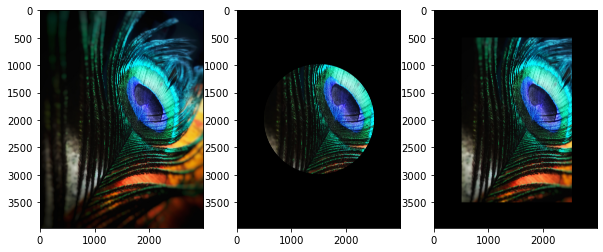

In [ ]:
# Masking
blank = np.zeros(img.shape[:2],dtype = "uint8")
circle = cv.circle(blank.copy(),(img.shape[1]//2,img.shape[0]//2),1000,255,-1)
rectangle = cv.rectangle(blank.copy(),(500,3500),(2500,500),(256),-1)

masked_1 = cv.bitwise_and(img,img,mask=circle)
masked_2 = cv.bitwise_and(img,img,mask=rectangle)


fig,axs = plt.subplots(1,3,figsize=(10,4))
axs[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
axs[1].imshow(cv.cvtColor(masked_1,cv.COLOR_BGR2RGB))
axs[2].imshow(cv.cvtColor(masked_2,cv.COLOR_BGR2RGB))
